# Modelo Binomial

Juan Sosa PhD

Email:   jcsosam@unal.edu.co

GitHub:  https://github.com/jstats1702 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from tabulate import tabulate

# Modelo

El modelo para **variables binarias** $y_i\in \{0,1\}$, con $i = 1,\ldots,n$, está dado por
$$
\begin{align*}
y_i\mid\theta &\stackrel{\text{iid}}{\sim}\textsf{Ber}(\theta) \\
\theta &\sim p(\theta)
\end{align*}
$$
donde $\theta\in\Theta =(0,1)$.

La **distribución muestral** de $\boldsymbol{y} = (y_1,\ldots,y_n)$ dado $\theta$ es
$$
p(\boldsymbol{y}\mid\theta) = \prod_{i=1}^n \theta^{y_i}(1-\theta)^{1-y_i} = \theta^{y}(1-\theta)^{n - y}\,,
$$
donde $y = \sum_{i=1}^n y_i$. 

Esta expresión sugiere que $y$ es un **estadístico suficiente** para $\theta$ ($y$ contiene toda la información de los datos para hacer inferencia sobre $\theta$). 

Sea $y_1,\ldots,y_n$ una secuencia de variables aleatorias con distribución de probabilidad $f_\theta(y_1,\ldots,y_n)$ que depende de un parámetro desconocido $\theta$. Se dice que el estadístico $t=t(y_1,\ldots,y_n)$ es un **estadístico suficiente** para $\theta$ si la distribución condicional de $y_1,\ldots,y_n$ dado $t$ no depende de $\theta$.

**(Teorema de Factorización de Fisher-Neyman.)** $t(y_1,\ldots,y_n)$ es un **estadístico suficiente** para $\theta$ si y sólo si se pueden encontrar dos funciones no negativas $h$ y $g_\theta$ tales que $f_\theta(y_1,\ldots,y_n) = h(y_1,\ldots,y_n)\,g_\theta(t(y_1,\ldots,y_n))$.

En este caso,  
$$
p(\boldsymbol{y}\mid\theta) = \theta^y (1 - \theta)^{n - y},
$$  
donde $h(\boldsymbol{y}) = 1$ y $g_\theta(s) = \theta^y (1 - \theta)^{n - y}$.  

Dado que esta factorización satisface el criterio, $y$ es suficiente para $\theta$ en el modelo Binomial.

Dado que las $y_i$ son condicionalmente i.i.d. dado $\theta$ y $y$ es un estadístico suficiente para $\theta$, entonces se tiene el modelo equivalente
$$
\begin{align*}
y\mid\theta &\sim \textsf{Bin}(n,\theta) \\
\theta &\sim p(\theta) 
\end{align*}
$$
donde $y\in\mathcal{Y}=\{0,\ldots,n\}$.

# Familias conjugadas

Una familia de distribuciones $\mathcal{P}$ es **conjugada** para la distribución muestral $p(\boldsymbol{y}\mid\boldsymbol{\theta})$, siempre que $p(\boldsymbol{\theta}\mid \boldsymbol{y}) \in \mathcal{P}$ cuando $p(\boldsymbol{\theta}) \in \mathcal{P}$.

Las previas conjugadas conllevan a **cálculos fáciles de realizar**, pero pueden ser **poco flexibles** para representar información previa.

Sea $y$ una variable aleatoria cuya distribución de probabilidad depende de un solo parámetro $\phi$. Se dice que esta distribución pertenece a la **familia exponencial de un parámetro** si la función de densidad de probabilidad (función de masa de probabilidad) de $y$ se puede expresar como
$$
p(y\mid\phi) = h(y)\,c(\phi)\exp{ \left\{ \phi\,t(y) \right\} }
$$
donde $h$, $c$ y $t$ son funciones conocidas.

Para distribuciones muestrales pertenecientes la familia exponencial de un parámetro, la **distribución previa conjugada** es de la forma
$$
p(\phi) \propto \,c(\phi)^{n_0}\exp{ \left\{ \phi\,n_0\,t_0 \right\} }
$$
dado que
$$
p(\phi\mid\boldsymbol{y}) \propto c(\phi)^{n_0 + n} \exp{ \left\{ \phi\left[\,n_0\,t_0 + n\,t(\boldsymbol{y}) \right] \right\} }
$$
donde $t(\boldsymbol{y}) = \frac{1}{n}\sum_{i=1}^n t(y_i)$. Bajo esta formulación, $n_0$ es una medida de cuán informativa es la distribución previa y $t_0$ es el valor esperado previo de $t(y)$.

En el caso de $y\mid\theta\sim\textsf{Ber}(\theta)$, se tiene que
$$
\phi = \log\left(\frac{\theta}{1-\theta}\right)\,,\qquad
t(y) = y\,,\qquad
h(y) = 1\,,\qquad
c(\phi) = (1+e^\phi)^{-1}\,,
$$
dado que
$$
p(y \mid \theta) = \theta^y (1 - \theta)^{1 - y} = \exp { \left( y \log \frac{\theta}{1 - \theta} + \log (1 - \theta) \right) },
$$
de donde,
$$
p(\phi) \propto (1+e^\phi)^{-n_0}e^{ \phi\,n_0\,t_0  }
\quad\Longleftrightarrow\quad
p(\theta) \propto \theta^{n_0t_0 - 1}(1-\theta)^{n_0(1-t_0) - 1}
\quad\Longleftrightarrow\quad \theta\sim\textsf{Beta}(n_0t_0,n_0(1-t_0))\,.
$$

# Modelo Beta-Binomial 

La familia de distribuciones **Beta** es **conjugada** para la distribución muestral **Binomial**.

El **modelo Beta-Binomial** es
$$
\begin{align*}
y\mid\theta &\sim \textsf{Bin}(n,\theta) \\
\theta &\sim \textsf{Beta}(a,b)
\end{align*}
$$
donde $a$ y $b$ son los **hiperparámetros** del modelo (se eligen de tal forma que $p(\theta)$ refleje el estado de información acerca de $\theta$ externo al conjunto de datos). 

## Distribución posterior

La **distribución posterior** de $\theta$ es
$$
\begin{align*}
p(\theta\mid y) &\propto p(\theta\mid y)\,p(\theta) \\
&= \binom{n}{y} \theta^y (1 - \theta)^{n-y}\,\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1} (1 - \theta)^{b-1} \\
&\propto \theta^{a + y - 1} (1 - \theta)^{b + n - y -1}
\end{align*}
$$
lo que corresponde al núcleo de una distribución Beta con parámetros $a + y$ y $b + n - y$, de donde
$$
\theta\mid y \sim \textsf{Beta}(\theta \mid a + y, b+n-y)\,.
$$

## Distribución marginal

La **distribución marginal** de $y$ es
$$
\begin{align*}
p(y) &= \int_\Theta p(y\mid\theta)\,p(\theta)\,\text{d}\theta \\
&= \int_0^1 \binom{n}{y} \theta^y (1 - \theta)^{n-y}\,\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1} (1 - \theta)^{b-1}\,\text{d}\theta \\
&= \binom{n}{y} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \int_0^1 \theta^{a + y - 1} (1 - \theta)^{b + n - y -1}\, \text{d}\theta \\ 
&= \binom{n}{y} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a+y)\,\Gamma(b+n-y)}{\Gamma(a+b+n)}
\end{align*}
$$
y por lo tanto,
$$
p(y) = \frac{\Gamma(n+1)}{\Gamma(y+1)\Gamma(n-y+1)}\,\frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\frac{\Gamma(a+y)\,\Gamma(b+n-y)}{\Gamma(a+b+n)}\,,\quad y\in\{0,\ldots,n\}\,.
$$

Esta distribución se conoce como **distribución Beta Binomial** con parámetros $n\in\mathbb{N}$, $a>0$ y $b>0$, lo que se denota con $y\sim\textsf{Beta-Binomial}(n,a,b)$. 

Esta distribución es un promedio ponderado (mezcla) de distribuciones Binomiales, ponderadas por la distribución Beta.   

## Media posterior 

La **media posterior** es
$$
\textsf{E}(\theta\mid y) = \frac{a+y}{a+b+n} = \frac{a+b}{a+b+n}\cdot\frac{a}{a+b}+\frac{n}{a+b+n}\cdot\frac{y}{n}\,,
$$
la cual es un **promedio ponderado** de la media previa $\textsf{E}(\theta) = \frac{a}{a+b}$ y la media muestral $\bar{y} = \frac{y}{n}$ con pesos proporcionales a $a+b$ y $n$, respectivamente. 

Esta expresión conlleva a la siguiente interpretación de los hiperparámetros: 

- $a+b$ = tamaño muestral previo.
- $a$ = número previo de 1's.
- $b$ = número previo de 0's. 
- Si $n >> a+b$, entonces la mayoría de la información proviene de los datos en lugar de la información previa. 

## Predicción

La **distribución predictiva posterior** de una observación futura $y^*\in\{0,1\}$ es 
$$
\begin{align*}
\textsf{Pr}(y^* = 1\mid y) &= \int_\Theta p(y^* = 1\mid \theta)\,p(\theta\mid y)\,\text{d}\theta \\
&= \int_0^1 \theta^1 (1-\theta)^{1 - 1}\, \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)} \, \theta^{a + y - 1} (1 - \theta)^{b + n - y}\, \text{d}\theta \\
&= \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)} \int_0^1 \theta^{a + y + 1 - 1} (1 - \theta)^{b + n - y-1}\, \text{d}\theta \\
&= \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)} \frac{\Gamma(a+y+1)\Gamma(b+n-y)}{\Gamma(a+b+n+1)}
\end{align*}
$$
y por lo tanto,
$$
y^*\mid y \sim \textsf{Ber}\left( \frac{a+y}{a+b+n} \right)\,.
$$

La distribución predictiva posterior **depende únicamente** de los hiperparámetros y de los datos observados, sin involucrar cantidades desconocidas. Por lo tanto, $y^*$ **no es independiente** de $y$, ya que observar $y$ proporciona información sobre $\theta$, lo que a su vez **afecta** la distribución de $y^*$.

## Intervalos de credibilidad

Se quiere identificar **regiones del espacio de parámetros** que con alta probabilidad contengan el valor del parámetro de interés.

Se dice que el **intervalo de credibilidad**  $(l,u)$ tiene una **cobertura Bayesiana** del $100(1-\alpha)\%$ para $\theta$, con $0 < \alpha < 1$, si
$$
\textsf{Pr}(l < \theta < u\mid\boldsymbol{y}) = 1-\alpha\,.
$$

Este intervalo describe el estado de información acerca de la localización de $\theta$ **después** de observar los datos.

Esta interpretación es radicalmente diferente de la **cobertura frecuentista**, la cual describe la probabilidad de que el intervalo pase por el valor verdadero de $\theta$ **antes** de observar los datos.

La manera más sencilla de obtener intervalos de credibilidad es por medio de los **percentiles de la distribución posterior** de forma que
$$
\textsf{Pr}\left(\theta_{\alpha/2} < \theta < \theta_{1-\alpha/2}\mid \boldsymbol{y}\right) = 1-\alpha\,.
$$

**(Teorema.)** Si un intervalo de credibilidad tiene un nivel de confianza Bayesiano de $100(1-\alpha)\%$, entonces este intervalo tiene asintóticamente un nivel de confianza frecuentista de $100(1-\alpha)\%$ (Hartigan, 1966).

# Ejemplo: Víctimas violencia sexual

Datos de las víctimas de violencia sexual suministrados por el **Observatorio de Memoria y Conflicto** y el **Centro Nacional de Memoria Histórica** disponibles en este [enlace](https://micrositios.centrodememoriahistorica.gov.co/observatorio/portal-de-datos/base-de-datos/).

Se quiere hacer inferencia sobre la **proporción poblacional de mujeres victimas de violencia sexual en 2016** $\theta$ por medio de un **modelo Beta-Binomial** con una **distribución previa no informativa**.

De acuerdo con [Semana](https://www.semana.com/nacion/articulo/el-918-de-los-abusos-sexuales-en-colombia-pertenecen-a-mujeres/202212/), el **91.8%** de los abusos sexuales en Colombia pertenecen a mujeres. ¿Los datos en 2016 apoyan esta afirmación?

## Tratamiento de datos

Se define $y_i = 1$ si el individuo $i$ es mujer, y $y_i = 0$ en caso contrario, para $i = 1,\ldots,n$.

In [11]:
# Datos
df = pd.read_csv("victimas.txt", sep="\t")

In [15]:
# Dimensión
print(df.shape)  # (filas, columnas)

(15886, 18)


In [19]:
# Variables
print(df.columns.tolist())

['id_caso', 'codigo_dane_municipio', 'municipio', 'departamento', 'agno', 'mes', 'dia', 'id_persona', 'sexo', 'etnia', 'ocupacion', 'calidad_victima', 'tipo_poblacion', 'militante_politico', 'grupo_armado', 'descripcion_grupo_armado', 'situacion_victima', 'edad']


In [23]:
# Frecuencias de la variable 'sexo'
print(df['sexo'].value_counts())

sexo
Mujer              14378
Hombre              1481
Sin Informacion       27
Name: count, dtype: int64


In [25]:
# Proporción de datos faltantes (27 valores faltantes entre 15886 observaciones)
print(27 / 15886)

0.0016996097192496537


In [27]:
# Codificación
df = df[df['sexo'] != "Sin Informacion"]
df.loc[df['sexo'] == "Mujer", 'sexo'] = 1
df.loc[df['sexo'] == "Hombre", 'sexo'] = 0
df['sexo'] = pd.to_numeric(df['sexo'])

# Sexo año 2016
y = df[df['agno'] == 2016]['sexo']

# Frecuencias sexo año 2016
print(y.value_counts())

sexo
1    69
0    11
Name: count, dtype: int64


In [29]:
# Tamaño de muestra
n = len(y)
print(n)

80


In [31]:
# Estadístico suficiente
s = y.sum()
print(s)

69


## Distribución posterior

In [38]:
# Hiperparámetros
a = 1
b = 1

# Parámetros de la posterior
ap = a + s
print(ap)

70


In [42]:
bp = b + n - s
print(bp)

12


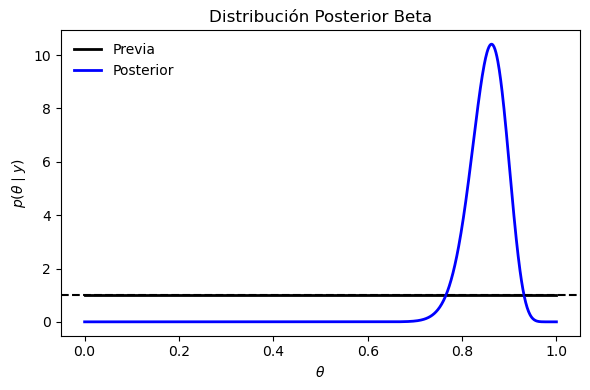

In [44]:
# Dominio para theta
x = np.linspace(0, 1, 1000)

# Densidad posterior
posterior = beta.pdf(x, ap, bp)

# Densidad previa (opcional, uniforme si Beta(1,1))
prior = beta.pdf(x, a, b)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, prior, label='Previa', color='black', linewidth=2)
plt.plot(x, posterior, label='Posterior', color='blue', linewidth=2)

# Línea horizontal de referencia
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)

# Etiquetas y título
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta \mid y)$')
plt.title('Distribución Posterior Beta')
plt.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

## Inferencia 2016

In [47]:
# Media posterior
media = round(ap / (ap + bp), 3)
print(media)

0.854


In [49]:
# Mediana posterior (aproximación de la mediana de la Beta)
mediana = round((ap - 1/3) / (ap + bp - 2/3), 3)
print(mediana)

0.857


In [51]:
# Moda posterior (si ap > 1 y bp > 1)
moda = round((ap - 1) / (ap + bp - 2), 3)
print(moda)

0.862


In [53]:
# Coeficiente de variación (CV)
cv = round(np.sqrt((ap * bp) / ((ap + bp) ** 2 * (ap + bp + 1))) / (ap / (ap + bp)), 3)
print(cv)

0.045


In [57]:
# Intervalo de credibilidad al 95%
intervalo = np.round(beta.ppf([0.025, 0.975], ap, bp), 3)
print(intervalo)

[0.77  0.921]


In [63]:
# Probabilidad posterior de que theta > 0.8
prob_mayor_08 = round(beta.sf(0.8, ap, bp), 3)  # sf = 1 - cdf
print(prob_mayor_08)

0.908


In [67]:
# Crear tabla de resultados
out = pd.DataFrame({
    'Media': [media],
    'Mediana': [mediana],
    'Moda': [moda],
    'CV': [cv],
    'Q2.5%': [intervalo[0]],
    'Q97.5%': [intervalo[1]]
})

# Mostrar tabla con formato
print(tabulate(out.round(3), headers='keys', tablefmt='github',
               showindex=False, stralign='center',
               numalign='center'))

|  Media  |  Mediana  |  Moda  |  CV   |  Q2.5%  |  Q97.5%  |
|---------|-----------|--------|-------|---------|----------|
|  0.854  |   0.857   | 0.862  | 0.045 |  0.77   |  0.921   |


## Inferencia 2000-2021

In [72]:
# Hiperparámetros: previa Beta(1,1)
a = 1
b = 1

# Inicializar lista para almacenar resultados
out_list = []

# Ajuste del modelo por año
for i, agno in enumerate(range(2000, 2022), start=1):
    # Filtrar datos por año
    y = df[df['agno'] == agno]['sexo']
    n = len(y)
    s = y.sum()

    # Parámetros de la posterior
    ap = a + s
    bp = b + n - s

    # Estadísticas de interés
    me = ap / (ap + bp)  # Media
    de = np.sqrt((ap * bp) / ((ap + bp)**2 * (ap + bp + 1)))  # Desviación estándar
    ic95 = beta.ppf([0.025, 0.975], ap, bp)  # IC 95%
    ic99 = beta.ppf([0.005, 0.995], ap, bp)  # IC 99%

    # Almacenar en la lista
    out_list.append([agno, n, me, de / me, ic95[0], ic95[1], ic99[0], ic99[1]])

# Convertir la lista en DataFrame
out = pd.DataFrame(out_list, columns=[
    "Año", "n", "Media", "CV", "IC95_Lower", "IC95_Upper", "IC99_Lower", "IC99_Upper"
])

In [76]:
# Renombrar columnas de la tabla
out.columns = ["Año", "n", "Media", "CV", "Q2.5%", "Q97.5%", "Q0.5%", "Q99.5%"]

# Crear tabla con las columnas necesarias
tabla = out[["Año", "n", "Media", "CV", "Q2.5%", "Q97.5%"]].round(3)

# Mostrar con formato tipo kable
print(tabulate(tabla, headers="keys", tablefmt="github", showindex=False, stralign="center", numalign="center"))

# Título manual (ya que tabulate no lo incluye)
print("\nInferencia sobre la proporción poblacional de mujeres víctimas de violencia sexual en 2020-2021.")


|  Año  |  n   |  Media  |  CV   |  Q2.5%  |  Q97.5%  |
|-------|------|---------|-------|---------|----------|
| 2000  | 1181 |  0.932  | 0.008 |  0.916  |  0.945   |
| 2001  | 1125 |  0.913  | 0.009 |  0.896  |  0.929   |
| 2002  | 1486 |  0.894  | 0.009 |  0.878  |  0.909   |
| 2003  | 1325 |  0.909  | 0.009 |  0.893  |  0.924   |
| 2004  | 1145 |  0.935  | 0.008 |  0.92   |  0.948   |
| 2005  | 925  |  0.915  | 0.01  |  0.896  |  0.932   |
| 2006  | 565  |  0.919  | 0.012 |  0.895  |   0.94   |
| 2007  | 439  |  0.93   | 0.013 |  0.904  |  0.952   |
| 2008  | 402  |  0.913  | 0.015 |  0.884  |  0.939   |
| 2009  | 325  |  0.93   | 0.015 |   0.9   |  0.955   |
| 2010  | 316  |  0.906  | 0.018 |  0.871  |  0.935   |
| 2011  | 314  |  0.921  | 0.016 |  0.889  |  0.948   |
| 2012  | 398  |  0.95   | 0.011 |  0.927  |  0.969   |
| 2013  | 414  |  0.921  | 0.014 |  0.893  |  0.945   |
| 2014  | 668  |  0.943  | 0.009 |  0.925  |  0.959   |
| 2015  | 331  |  0.937  | 0.014 |  0.908  |   0

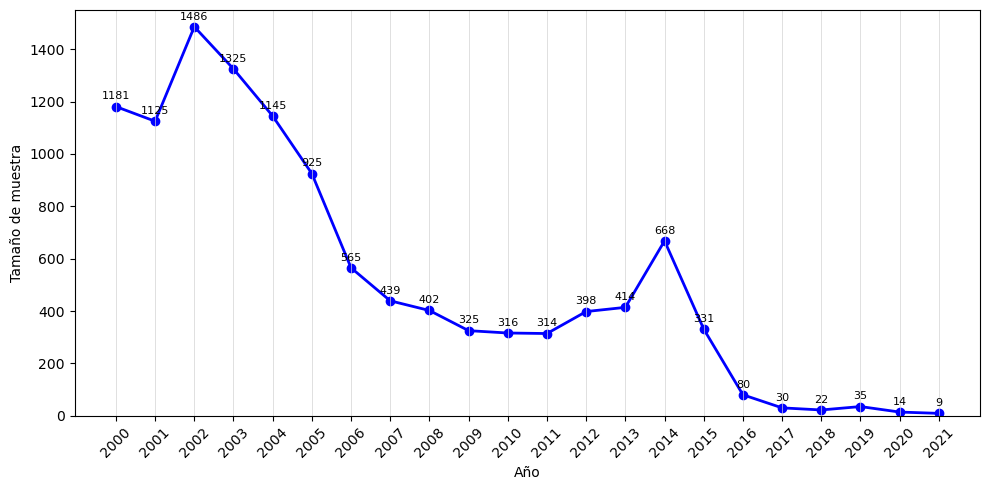

In [80]:
# Datos para graficar
x = range(1, len(out) + 1)
y = out["n"]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='blue', linewidth=2)
plt.ylim(0, 1550)
plt.xlabel("Año")
plt.ylabel("Tamaño de muestra")

# Agregar líneas de referencia verticales
for i in x:
    plt.axvline(x=i, color="lightgray", linewidth=0.5)

# Etiquetas del eje X con los años
plt.xticks(ticks=x, labels=list(range(2000, 2022)), rotation=45)

# Agregar etiquetas con los valores del tamaño de muestra
for i, val in zip(x, y):
    plt.text(i, val + 20, str(int(val)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

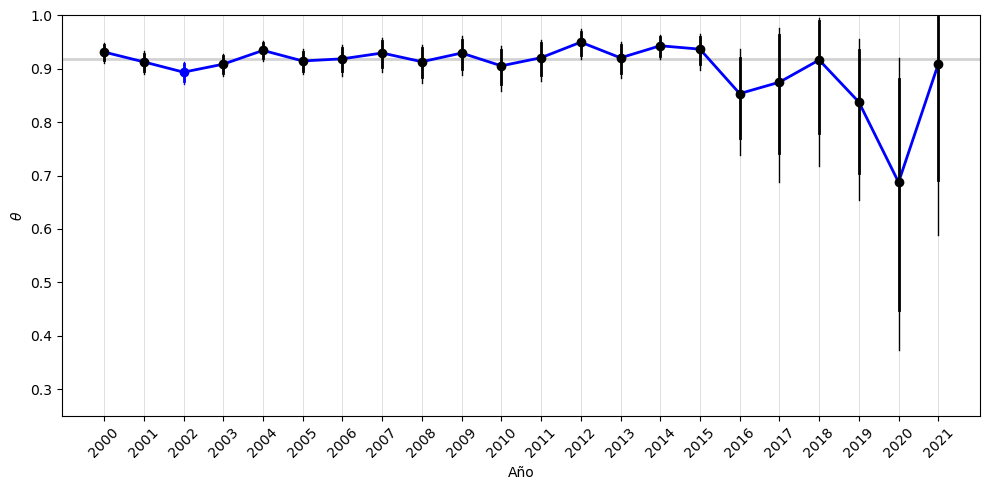

In [82]:
# Definir colores para los puntos según los intervalos
col = np.array(['black'] * len(out))  # 1 = negro
col[out["Q0.5%"] > 0.918] = 'red'     # 2 = rojo
col[out["Q99.5%"] < 0.918] = 'blue'   # 3 = azul

# Eje x: años como índices
x = np.arange(1, len(out) + 1)
media = out["Media"]
ic95_lower = out["Q2.5%"]
ic95_upper = out["Q97.5%"]
ic99_lower = out["Q0.5%"]
ic99_upper = out["Q99.5%"]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.ylim(0.25, 1)
plt.xlabel("Año")
plt.ylabel(r"$\theta$")

# Línea horizontal de referencia
plt.axhline(y=0.918, color="lightgray", linewidth=2)

# Línea de conexión entre estimaciones
plt.plot(x, media, color='blue', linewidth=2)

# Puntos coloreados según los intervalos
for i in range(len(out)):
    plt.plot(x[i], media[i], marker='o', color=col[i])

# Líneas verticales de referencia
for i in x:
    plt.axvline(x=i, color='lightgray', linewidth=0.5)

# Intervalos de credibilidad 95%
for i in range(len(out)):
    plt.plot([x[i], x[i]], [ic95_lower[i], ic95_upper[i]], color=col[i], linewidth=2)

# Intervalos de credibilidad 99%
for i in range(len(out)):
    plt.plot([x[i], x[i]], [ic99_lower[i], ic99_upper[i]], color=col[i], linewidth=1)

# Etiquetas del eje x
plt.xticks(ticks=x, labels=list(range(2000, 2022)), rotation=45)

plt.tight_layout()
plt.show()

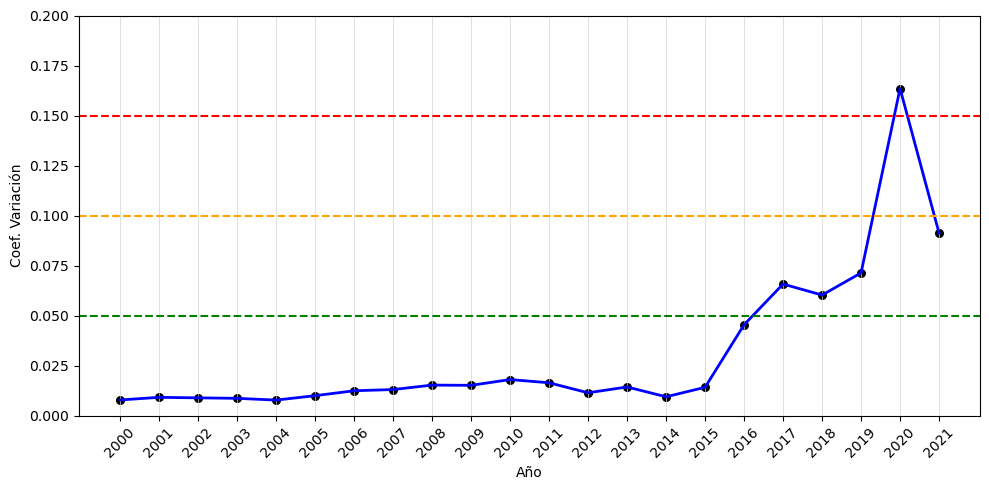

In [86]:
# Datos
x = range(1, len(out) + 1)
cv = out["CV"]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.ylim(0, 0.2)
plt.xlabel("Año")
plt.ylabel("Coef. Variación")

# Líneas verticales de referencia
for i in x:
    plt.axvline(x=i, color="lightgray", linewidth=0.5)

# Puntos
plt.scatter(x, cv, color='black', s=30)

# Línea de conexión
plt.plot(x, cv, color='blue', linewidth=2)

# Eje X con etiquetas de años
plt.xticks(ticks=x, labels=list(range(2000, 2022)), rotation=45)

# Líneas horizontales de referencia (niveles de CV)
plt.axhline(y=0.05, color='green', linestyle='--')         # Verde
plt.axhline(y=0.10, color='#FFA500', linestyle='--')       # Naranja
plt.axhline(y=0.15, color='red', linestyle='--')           # Rojo

plt.tight_layout()
plt.show()

# Ejercicios conceptuales

- Considere el modelo Beta-Binomial:  
$$
y \mid \theta \sim \textsf{Bin}(n, \theta), \quad \theta \sim \textsf{Beta}(a, b)
$$
donde $y \in \mathcal{Y} = \{0, \dots, n\}$ y $\theta \in \Theta = (0,1)$.

  a. Demuestre que la distribución marginal de $y$ es  
  $$
  p(y) = \frac{\Gamma(n+1)}{\Gamma(y+1)\,\Gamma(n-y+1)}\,\frac{\Gamma(a+b)}{\Gamma(a+b+n)}\,\frac{\Gamma(a+y)\,\Gamma(b+n-y)}{\Gamma(a)\,\Gamma(b)}.
  $$

  b. Demuestre que la media y la varianza marginal de $y$ son  
  $$
  \textsf{E}(y) = \frac{n a}{a+b}, \quad \textsf{Var}(y) = \frac{n a b (a+b+n)}{(a+b)^2 (a+b+1)}.
  $$

  Sugerencia:  
  $$
  \textsf{E}(X) = \textsf{E}(\textsf{E}(X \mid Y)), \quad \textsf{Var}(X) = \textsf{E}(\textsf{Var}(X \mid Y)) + \textsf{Var}(\textsf{E}(X \mid Y)).
  $$

  c. Demuestre que:
  $$
  \textsf{E}(\theta \mid y) = \omega \, \textsf{E}(\theta) + (1-\omega)\, \bar{y},
  $$
  donde:
  $$
  \omega = \frac{b}{b+n}, \quad 1 - \omega = \frac{n}{b+n}, \quad \bar{y} = \frac{y}{n}.
  $$

- Suponga una población con artículos de $k \geq 2$ tipos y proporciones $\theta_j$ tales que $0 < \theta_j < 1$ para $j = 1, \dots, k$ y $\sum_{j=1}^{k} \theta_j = 1$. Sea $\boldsymbol{\theta} = (\theta_1, \dots, \theta_k)$. Si $\boldsymbol{n} = (n_1, \dots, n_k)$ es el número de artículos por tipo en una muestra aleatoria de tamaño $n$, entonces:
$$
\boldsymbol{n} \mid n, \boldsymbol{\theta} \sim \textsf{Multinomial}(n, \boldsymbol{\theta})
$$
si y solo si:
$$
p(\boldsymbol{n} \mid n, \boldsymbol{\theta}) = \frac{n!}{\prod_{j=1}^{k} n_j!} \prod_{j=1}^{k} \theta_j^{n_j},
$$
bajo las condiciones:
$$
\sum_{j=1}^{k} n_j = n, \quad 0 \leq n_j \leq n.
$$

Si además $\boldsymbol{\theta} \sim \textsf{Dirichlet}(a_1, \dots, a_k)$, entonces:
$$
\boldsymbol{\theta} \mid \boldsymbol{n} \sim \textsf{Dirichlet}(a_1 + n_1, \dots, a_k + n_k).
$$

- Sea $y \sim \textsf{Galenshore}(\alpha, \beta)$ con densidad:
$$
p(y\mid \alpha, \beta) = \frac{2}{\Gamma(\alpha)} \beta^{2\alpha} y^{2\alpha-1} e^{-\beta^2 y^2}, \quad y > 0
$$
entonces:
$$
\textsf{E}(y\mid \alpha, \beta) = \frac{\Gamma(\alpha + 1/2)}{\beta \Gamma(\alpha)}, \quad \textsf{E}(y^2\mid \alpha, \beta) = \frac{\alpha}{\beta^2}.
$$

  a. Identifique una clase de distribuciones previas conjugadas para $\beta$  
  b. Determine la distribución posterior de $\beta$ dada una muestra $y_1, \dots, y_n$  
  c. Exprese:
  $$
  \frac{p(\beta_a \mid y_1, \dots, y_n)}{p(\beta_b \mid y_1, \dots, y_n)}
  $$
  y simplifique  
  d. Calcule $\textsf{E}(\beta \mid y_1, \dots, y_n)$

- Demuestre que las siguientes distribuciones pertenecen a la familia exponencial: Bernoulli, Binomial, Multinomial, Poisson, Exponencial, Beta, Gamma, Normal

- Sea:
$$
p(y \mid \phi) = c(\phi)\,h(y)\,\exp(\phi\,t(y))
$$

  a. Derive:
  $$
  \int_{\mathcal{Y}} p(y \mid \phi) \, dy = 1
  $$
  con respecto a $\phi$ para demostrar que:
  $$
  \textsf{E}(t(y) \mid \phi) = -\frac{c'(\phi)}{c(\phi)}
  $$

  b. Si $p(\phi) \propto c(\phi)^{n_0} \exp(n_0 t_0 \phi)$, muestre que:
  $$
  \textsf{E} \left( -\frac{c'(\phi)}{c(\phi)} \right) = t_0
  $$

- Sea $\phi = g(\theta)$ con inversa $h$, entonces:
$$
p_{\phi}(\phi) = p_{\theta}(h(\phi)) \left| \frac{d h}{d\phi} \right|
$$

  a. Si $\theta \sim \textsf{Beta}(a, b)$ y $\phi = \log(\theta / (1-\theta))$, obtenga $p_{\phi}(\phi)$ para $a = b = 1$  
  b. Si $\theta \sim \textsf{Gamma}(a, b)$ y $\phi = \log(\theta)$, obtenga $p_{\phi}(\phi)$ para $a = b = 1$

- La distribución de Jeffreys es:
$$
p_J(\theta) \propto \sqrt{I(\theta)}, \quad I(\theta) = -\textsf{E} \left( \frac{d^2}{d\theta^2} \log p(y \mid \theta) \right)
$$

  a. Si $y \sim \textsf{Bin}(n, \theta)$, entonces:
  $$
  p_J(\theta) \propto \theta^{-1/2}(1-\theta)^{-1/2}
  $$

  b. Si $\psi = \textsf{logit}(\theta)$, entonces:
  $$
  p(y \mid \psi) \propto e^{\psi y}(1 + e^{\psi})^{-n}
  $$

  c. Verifique que la transformación de la previa de Jeffreys coincide en ambas parametrizaciones.

- Sea $x \mid \theta \sim \textsf{N}(\theta, \theta)$ con $\theta > 0$, entonces:
$$
p_J(\theta) \propto \frac{(2\theta + 1)^{1/2}}{\theta}
$$

- Sea $y_1, \dots, y_n$ i.i.d. con:
$$
\ell(\theta \mid y) = \sum_{i=1}^n \log p(y_i \mid \theta), \quad J(\theta) = -\frac{\partial^2 \ell(\theta \mid y)}{\partial \theta^2}
$$

La previa de información unitaria satisface:
$$
- \frac{\partial^2 \log p(\theta)}{\partial \theta^2} = \frac{J(\theta)}{n}
$$

  a. Si $y_i \sim \textsf{Ber}(\theta)$, calcule $J(\hat{\theta})/n$  
  b. Encuentre $p_U(\theta)$ tal que:
  $$
  \log p_U(\theta) = \frac{\ell(\theta \mid y)}{n} + c
  $$

  c. Analice $p(\theta \mid y) \propto p(y \mid \theta) p_U(\theta)$ como distribución posterior



# Ejercicios prácticos

- Se encuesta a $n = 100$ personas seleccionadas al azar en una ciudad con una población significativamente mayor. Se registra $y_i = 1$ si la persona $i$ apoya la política y $y_i = 0$ en caso contrario.

  a. Suponga que $y_i \mid \theta \overset{\text{iid}}{\sim} \textsf{Ber}(\theta)$. Escriba $p(\boldsymbol{y} \mid \theta)$ y $p(s \mid \theta)$, donde $\boldsymbol{y} = (y_1, \dots, y_n)$ y $s = \sum_{i=1}^n y_i$.  
  b. Si $\theta$ solo toma valores en $\{0.0, 0.1, \dots, 1.0\}$, calcule $p(s = 57 \mid \theta)$ para cada $\theta$ y grafique los resultados obtenidos.  
  c. Si $\theta$ sigue una distribución uniforme discreta, use el teorema de Bayes para calcular $p(\theta \mid s = 57)$ y grafique los resultados obtenidos.  
  d. Permita que $\theta \in (0,1)$ con distribución previa uniforme. Grafique $p(s = 57 \mid \theta)\,p(\theta)$.  
  e. Determine la distribución posterior de $\theta$. Grafique la distribución posterior y compárela con los resultados anteriores.  
  f. Exprese $\textsf{Beta}(a,b)$ en términos de $\theta_0 = \frac{a}{a + b}$ y $n_0 = a + b$, donde $a = \theta_0 n_0$ y $b = (1 - \theta_0) n_0$. Para $\theta_0 \in \{0.1, \dots, 0.9\}$ y $n_0 \in \{1, 2, 8, 16, 32\}$, calcule $a$, $b$ y $\textsf{Pr}(\theta > 0.5 \mid s = 57)$. Grafique los resultados obtenidos.

- Suponga que su conocimiento previo sobre $\theta$, la proporción de individuos que apoyan la pena de muerte en un país, se modela con una distribución $\textsf{Beta}$ con media $\textsf{E}(\theta) = 0.6$ y desviación estándar $\textsf{DE}(\theta) = 0.3$.

  a. Determine los hiperparámetros de la distribución previa y represente gráficamente su función de densidad.  
  b. Se toma una muestra aleatoria de 1,000 individuos, de los cuales el 65% apoya la pena de muerte. Calcule la media y la desviación estándar de la distribución posterior de $\theta$. Represente gráficamente la función de densidad posterior.  
  c. Analice la sensibilidad de la distribución posterior ante distintos valores de la media y la desviación estándar de la distribución previa, incluyendo el caso de una distribución previa no informativa.

- Un ingeniero inspecciona un lote de piezas para control de calidad y analiza diez elementos seleccionados al azar. Históricamente, la proporción de artículos defectuosos $\theta$ ha sido aproximadamente del 1% y rara vez ha superado el 2%.

  a. Determine una distribución previa conjugada para $\theta$ basada en la información histórica. Usando esta distribución, derive la distribución posterior de $\theta$ dada una muestra aleatoria de tamaño 10.  
  b. Suponga que el ingeniero no encuentra componentes defectuosos en su inspección. ¿Cuál es la distribución posterior de $\theta$? ¿Cuál es su media posterior?  
  c. Calcule el estimador de máxima verosimilitud para $\theta$. Como estimador puntual, ¿es preferible el estimador de máxima verosimilitud o la media posterior? Justifique su respuesta.

- Se desea estimar la probabilidad $\theta$ de reincidencia en adolescentes con base en un estudio en el que se observaron $n = 43$ individuos liberados de reclusión, de los cuales $y = 15$ reincidieron en un período de 36 meses.

  a. Usando una distribución previa $\textsf{Beta}(2,8)$ para $\theta$, grafique $p(\theta)$ y $p(\theta \mid y)$ como funciones de $\theta$. Calcule la media, la moda y la desviación estándar de la distribución posterior de $\theta$. Determine un intervalo de credibilidad al 95% basado en cuantiles.  
  b. Repita el inciso anterior, pero utilizando una distribución previa $\textsf{Beta}(8,2)$ para $\theta$.  
  c. Considere la siguiente distribución previa para $\theta$:
  
  $$
  p(\theta) = \frac{1}{4} \frac{\Gamma(10)}{\Gamma(2)\Gamma(8)} \left( 3\theta(1 - \theta)^7 + \theta^7(1 - \theta) \right),
  $$

  la cual representa una mezcla 75%-25% de las distribuciones previas $\textsf{Beta}(2,8)$ y $\textsf{Beta}(8,2)$. Grafique esta distribución previa y compárela con las previas de los incisos anteriores. Describa qué tipo de opinión previa representa esta distribución.  
  d. Para la distribución previa del inciso c.:  
     - Escriba explícitamente la expresión $p(y \mid \theta)\,p(\theta)$ y simplifíquela tanto como sea posible.  
     - La distribución posterior es una mezcla de dos distribuciones conocidas. Identifique estas distribuciones.  
     - Calcule y grafique $p(y \mid \theta)\,p(\theta)$ para varios valores de $\theta$. Aproximadamente, encuentre la moda de la distribución posterior y compare su relación con las modas obtenidas en los incisos anteriores.  
  e. Encuentre una fórmula general para los pesos de la mezcla dada en la segunda parte del inciso d. e interprete sus valores en términos del efecto de la evidencia observada sobre la información previa.

# Referencias

Hoff, P. D. (2009). *A First Course in Bayesian Statistical Methods*. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). *Bayesian Data Analysis* (3rd ed.). Chapman & Hall/CRC.